<a href="https://colab.research.google.com/github/AbhayAviSharma/Supervised_ML_Regression/blob/main/Closing_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression (Yes bank stock closing price prediction)
##### **Contribution**    - Individual
##### **Member -** ABHAY SHARMA

# **Project Summary -**

Yes Bank, a prominent institution in the Indian financial sector, has been in the spotlight since 2018 due to a high-profile fraud case involving its former CEO, Rana Kapoor. This project aims to explore the relationship between various financial indicators and Yes Bank's monthly closing stock prices. By employing regression analysis, we seek to develop a predictive model that can accurately forecast the bank's closing stock prices. The dataset used in this project includes historical monthly stock prices and a set of financial indicators.

# **GitHub Link -**

https://github.com/AbhayAviSharma

# **Problem Statement**


**The primary objective of this project is to develop a robust predictive model that can accurately forecast Yes Bank's monthly closing stock prices based on historical data and relevant financial indicators. This entails solving the following key challenges:**

1. Data Collection and Preprocessing: Gathering historical monthly closing stock prices of Yes Bank, along with financial indicators such as earnings, interest rates, and economic conditions, and preprocessing the dataset to ensure its quality and integrity.

2. Feature Selection: Identifying and selecting the most influential financial indicators that have a significant impact on Yes Bank's stock prices.

3. Regression Modeling: Developing an effective regression model (e.g., Linear Regression, Ridge Regression, Lasso Regression, or Random Forest Regression) that can capture the relationships between the selected features and Yes Bank's closing stock prices.

4. Model Evaluation: Assessing the performance of the regression model(s) using appropriate evaluation metrics (e.g., Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R-squared) to determine its predictive accuracy and reliability.

5. Model Fine-Tuning: If necessary, fine-tuning the selected regression model(s) to enhance predictive performance.

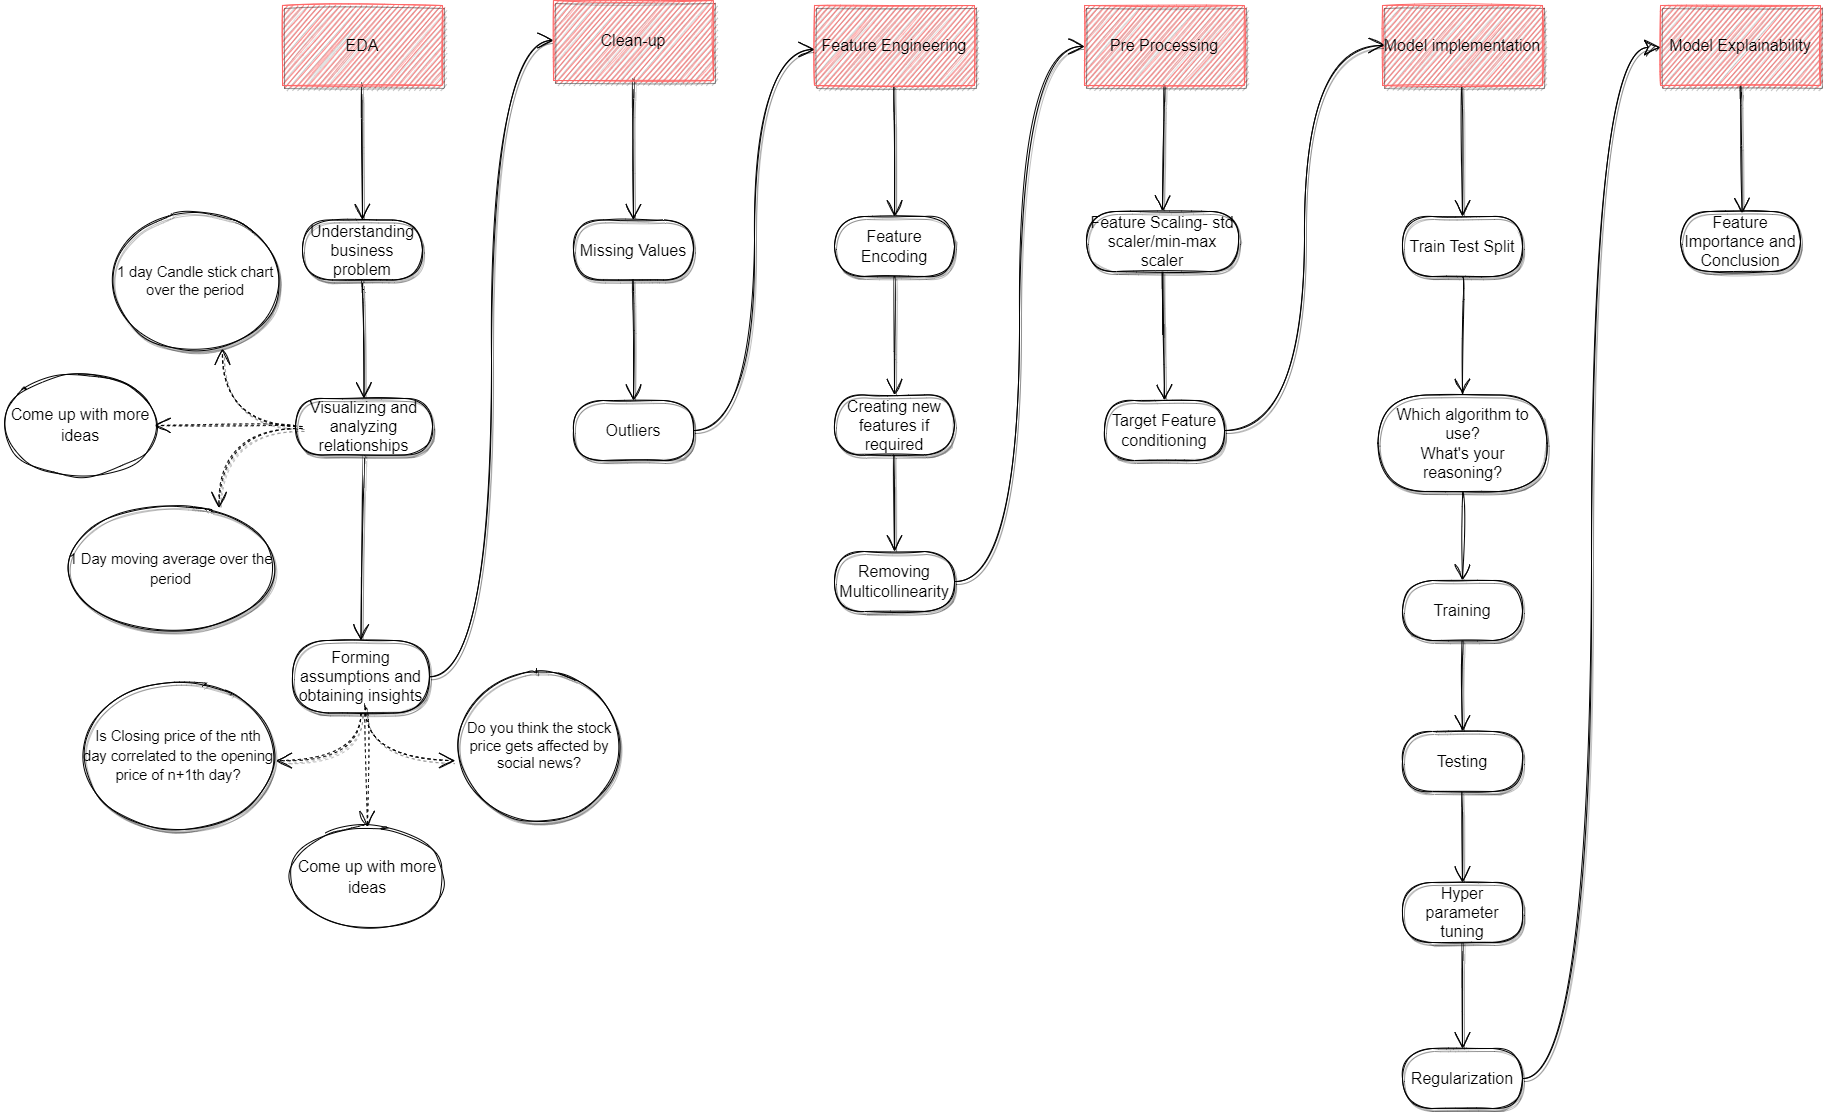

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# scikit learn for model training and optimization
from sklearn.linear_model import LinearRegression                                               # for regression model
from sklearn.linear_model import (Lasso, Ridge, ElasticNet)                                     # for regularization
from sklearn.tree import DecisionTreeRegressor                                                  # for Decision tree regressor
from sklearn.ensemble import RandomForestRegressor                                              # for Random Forst regressor
from sklearn.neighbors import KNeighborsRegressor                                               # for k-nn regressor
from sklearn.svm import SVR                                                                     # for support vector regressor
import xgboost as xgb                                                                           # for xgboost regressor
# required evaluation metrics
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error)
from sklearn.model_selection import train_test_split                                            # split train and test data
from sklearn.preprocessing import MinMaxScaler, StandardScaler                                  # for scaling the data
from sklearn.model_selection import GridSearchCV                                                # grid search for crosss validation

import warnings                                                                                # to handle warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading dataset
df = pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [4]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
null_df = df.isnull().sum()
null_df

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

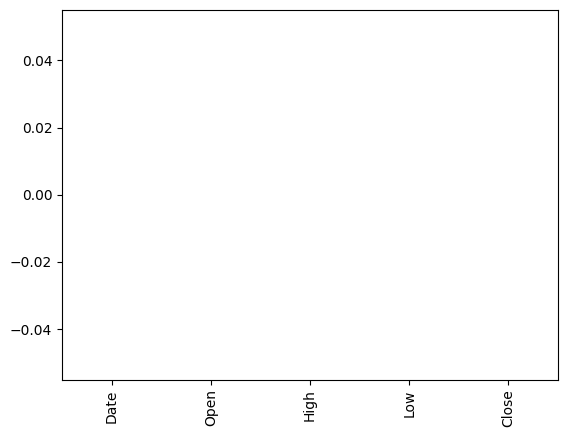

In [9]:
# Visualizing the missing values
null_df.plot(kind='bar')
plt.show()

### What did you know about your dataset?

1. There are '185' rows and '5' columns in the dataset.

2. The five columns are: 'Date', 'Open', 'High', 'Low', 'Close'.

3. There are no duplicated values in the dataset.

4. There are no null or empty values in the dataset.


## ***2. Understanding Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1. **Date** - shows the date of record.

2. **Open** - shows opening price.

3. **High** - shows highest price in the day.

4. **Low** - shows the lowest price in the day.

5. **Close** - shows closing price.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Let's get a copy of our original dataset first
df_copy = df.copy()

In [14]:
# Now first of all let's change datetime datatype
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [15]:
# let's check if it worked or not
df.head(2)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42


In [16]:
# all the data we have is numerical except 'Date', so let's set 'Date' as index
df.set_index('Date', inplace=True)               # Categorical Encoding

In [17]:
df.head(2)      # check

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42


### Manipulations done and insights found?

'Date' format needed to be changed, so I changed the format plus the data was numerical except the data in 'Date' column, therfore I made 'Date' as the index of the dataframe to ease further processing. Regardless, the data in dataset is clean and ready for the next process.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Univariate Analysis

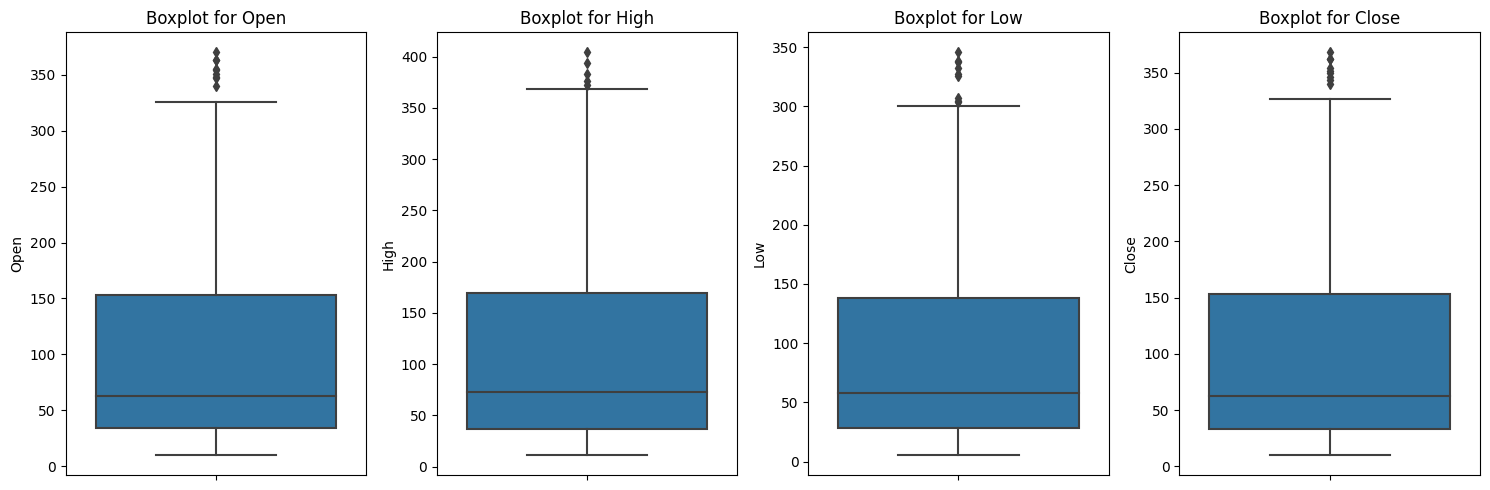

In [18]:
# first let's check for outliers in the data
plt.figure(figsize=(15,5))                          # sets size
num_cols = len(df.columns)                          # to create subplots in single row
for i,col in enumerate(df.columns):
  plt.subplot(1, num_cols, i+1)
  sns.boxplot(data=df, y=col, orient='v')
  plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots are effective for clear visual representation of the spread of data and identifying potential outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

We've got boxplots of data in each column seperately which gives information about '25%', '75%' and 'median' of Interquartile range represented by bottom end, top end and middle line inside box respectively.

Moreover the 'median' is closer to bottom line of the box meaning it is negatively skewed.

Also, we've got some outliers in the data represented by black dots in the plot.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers often represent extreme events that could pose significant risks to a business. Detecting and understanding these outliers can help businesses better prepare for and mitigate such risks which is just one of it's positive impacts.

#### Chart - 2

In [19]:
# We will first now seperate dependent variable and other independent variables
independent_variables = df.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


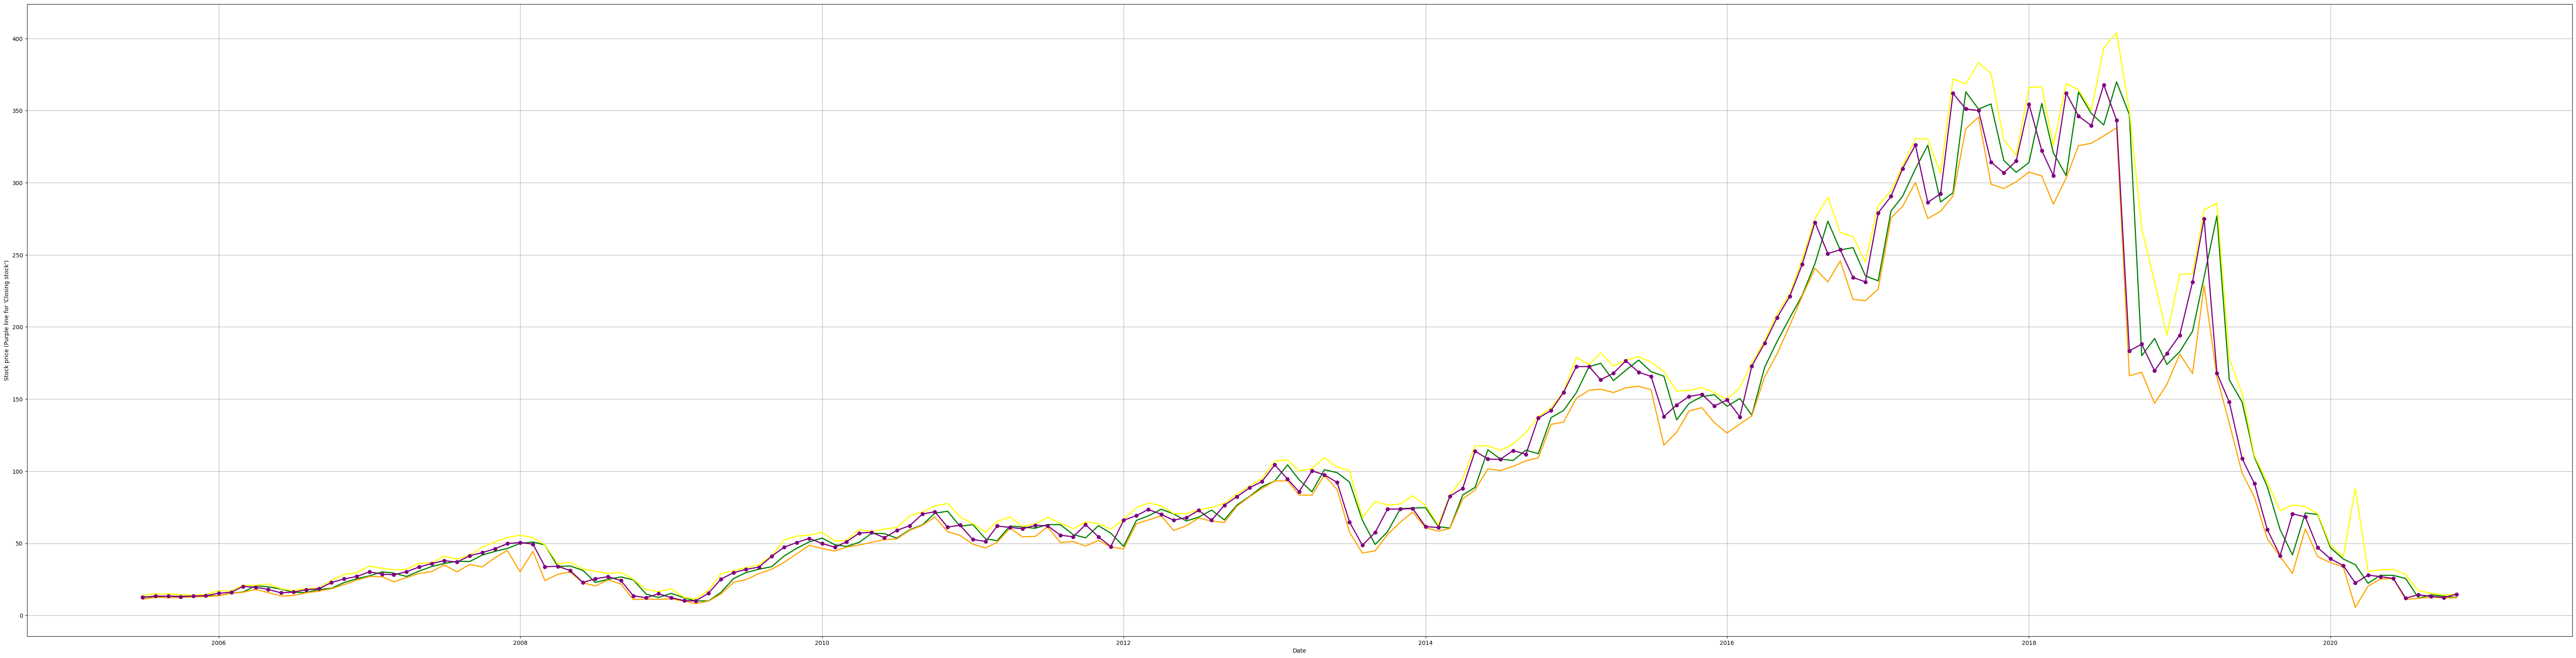

In [20]:
plt.figure(figsize=(80,20))
# plot independent variables
plt.plot(df.index, df['Open'], label='Open', linewidth=2, color='green')
plt.plot(df.index, df['High'], label='High', linewidth=2, color='yellow')
plt.plot(df.index, df['Low'], label='Low', linewidth=2, color='orange')
#plot dependent variable
plt.plot(df.index, df['Close'], label='Close', linewidth=2, color='purple', marker='o')
plt.xlabel('Date')
plt.ylabel("Stock price (Purple line for 'Closing stock')")
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

The above plot is useful when comparing data over time and with multiple variables.

##### 2. What is/are the insight(s) found from the chart?

We can see that the stock price is rising up around the time of 2018-19, the time when the fraud case involving Rana Kapoor happened and after which the stock price faced a
sharp decline.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can analyze trends easily which definitely helps in decision making processes and creating a positive impact in business.

#### Chart - 3

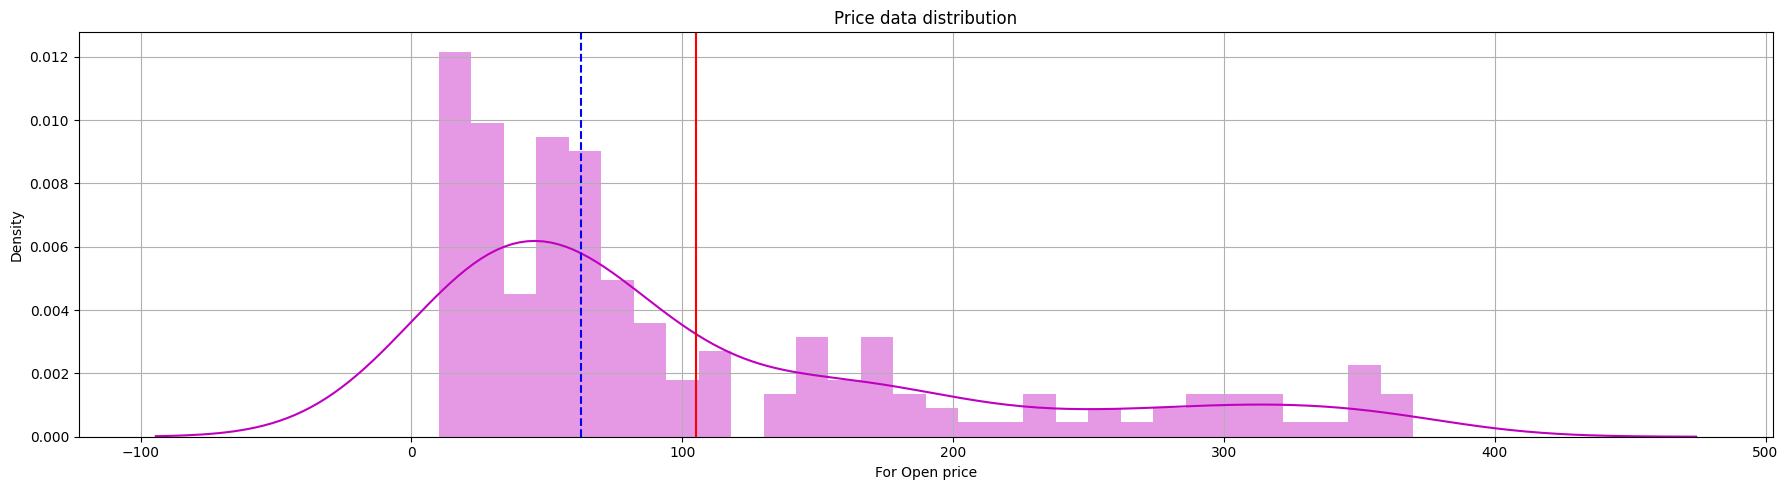

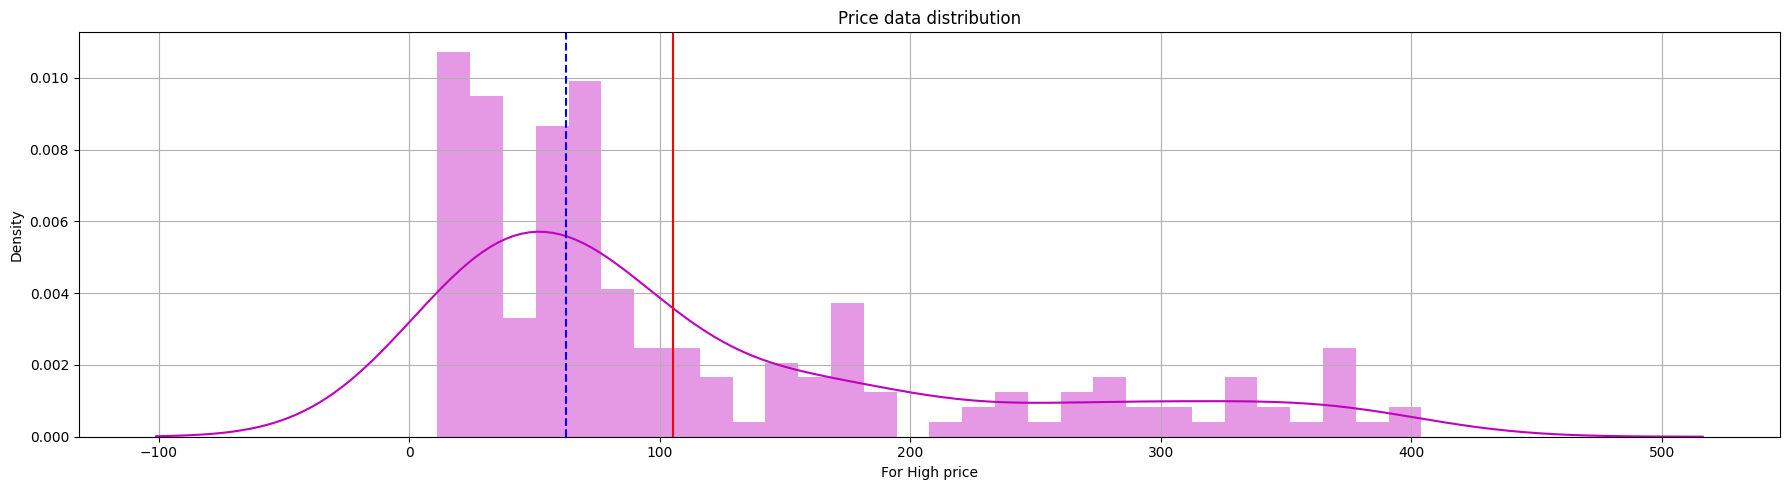

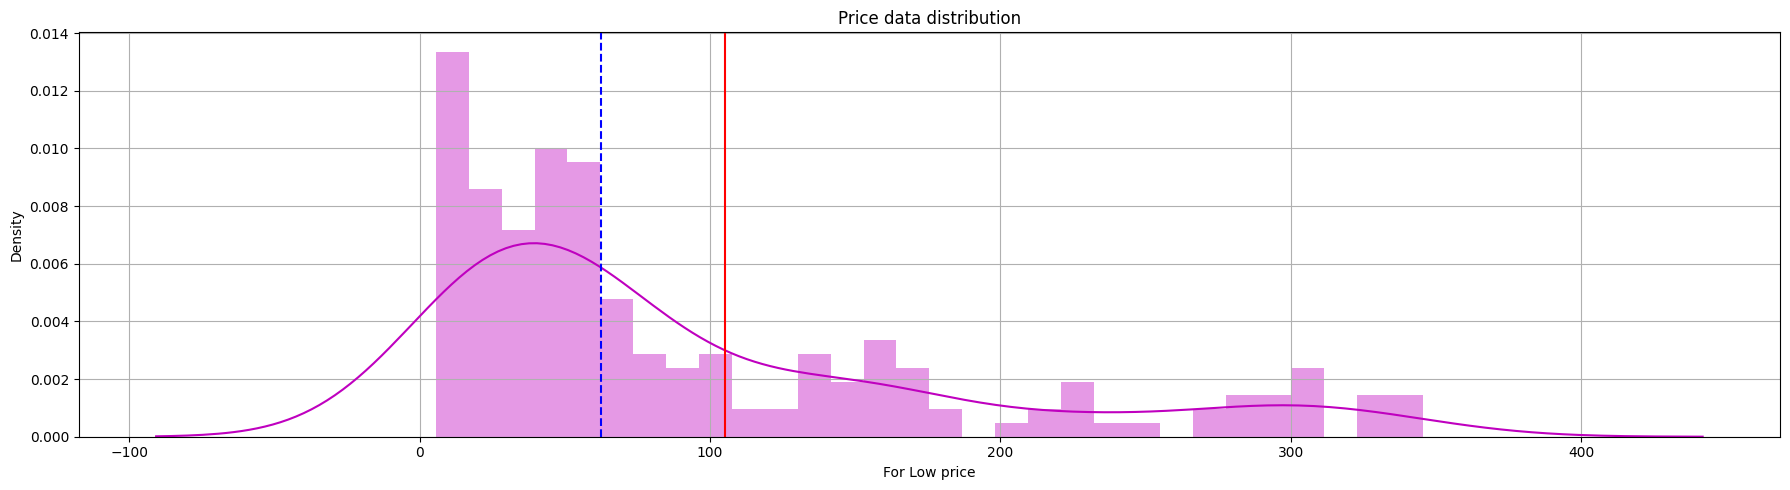

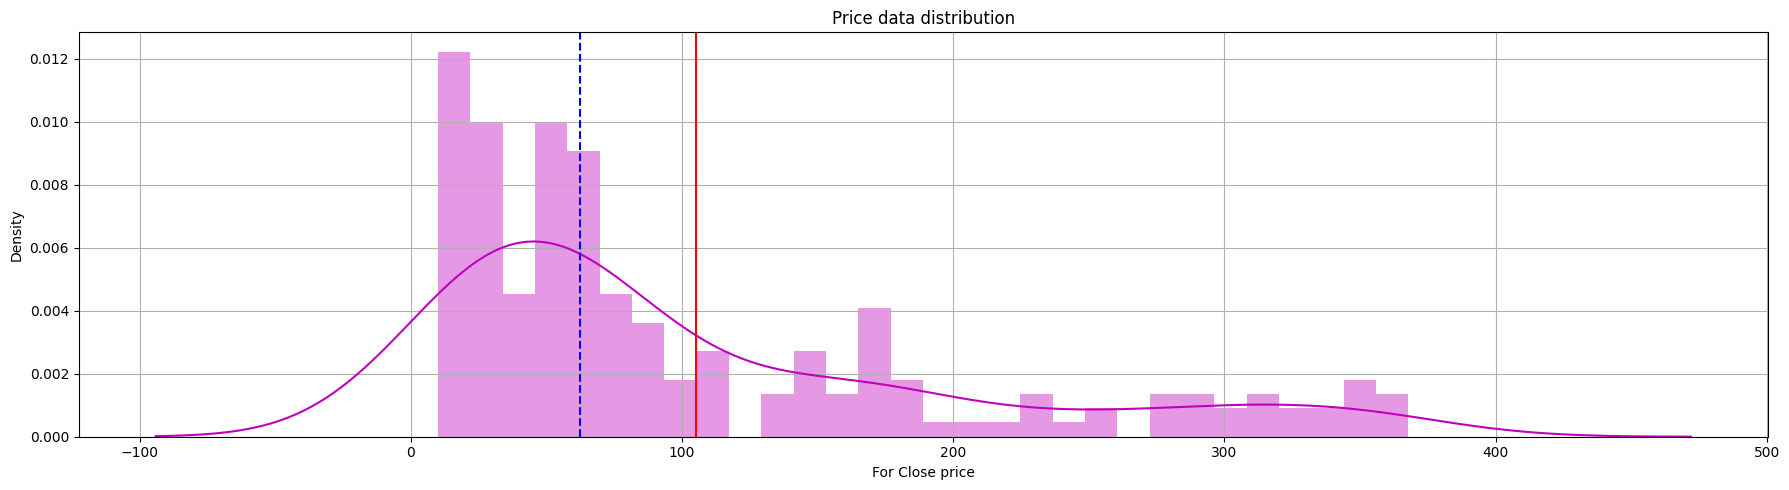

In [21]:
# Let's analyze our variables a little more
for col in df.columns:
  plt.figure(figsize=(18,5))
  sns.distplot(df[col], bins=30, kde=True, color='m')
  plt.xlabel(f'For {col} price')
  plt.ylabel('Density')
  plt.axvline(df['Close'].mean(), color='red')                            # red line for mean
  plt.axvline(df['Close'].median(), color='blue', linestyle='--')         # blue line for median
  plt.title('Price data distribution')
  plt.tight_layout()
  plt.grid()
  plt.show()

##### 1. Why did you pick the specific chart?

Distplots are good for knowing the distribution of a variable in a dataset.

##### 2. What is/are the insight(s) found from the chart?

1. The curve is nor symmetric as the peak is not around the mean of the fuction, hence they not fall under the category of normal distribution.

2. the distplot exhibits a longer tail on the right meaning it is 'positively skewed', implying that there are a few days with extremely high closing prices, while most days have lower prices.

3. Also the mean and median are at a significant distance with mean being greater than median, hence again implying data to be a 'right skewed distribution'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The distribution can tell us many things like growing or bullish market with occasional spikes, declining or bearish market with occasional dips,  unusual closing prices that may be caused by significant events or data errors etc. which can help in positive impact in business.

#### Chart - 4 (Data Transformation)

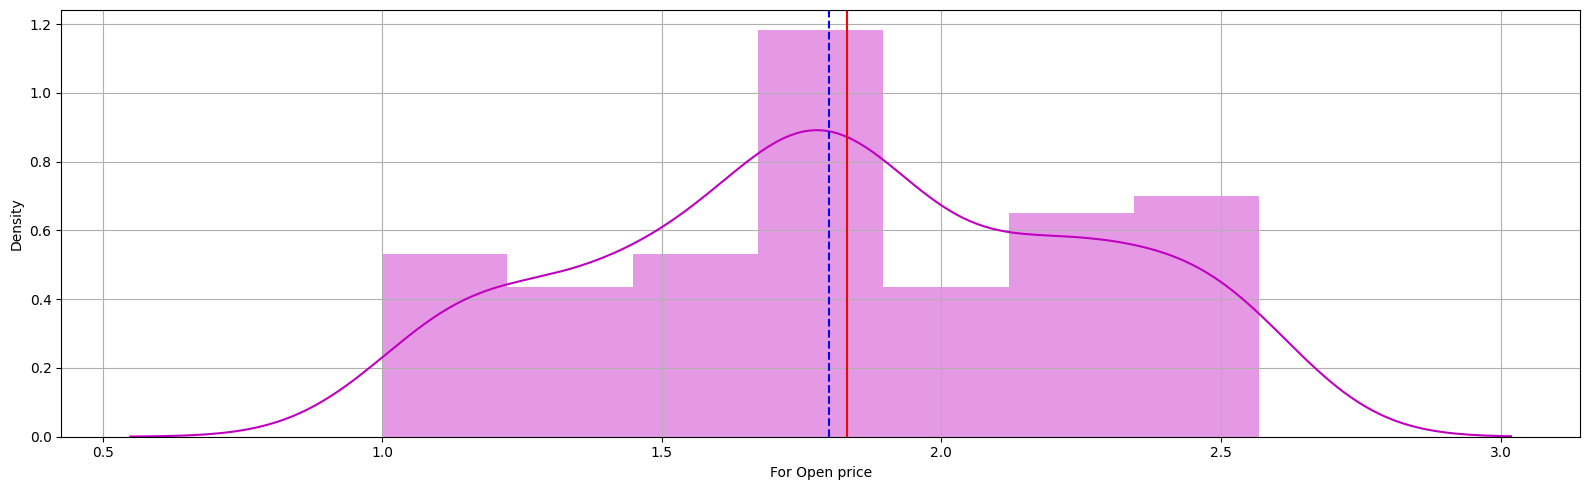

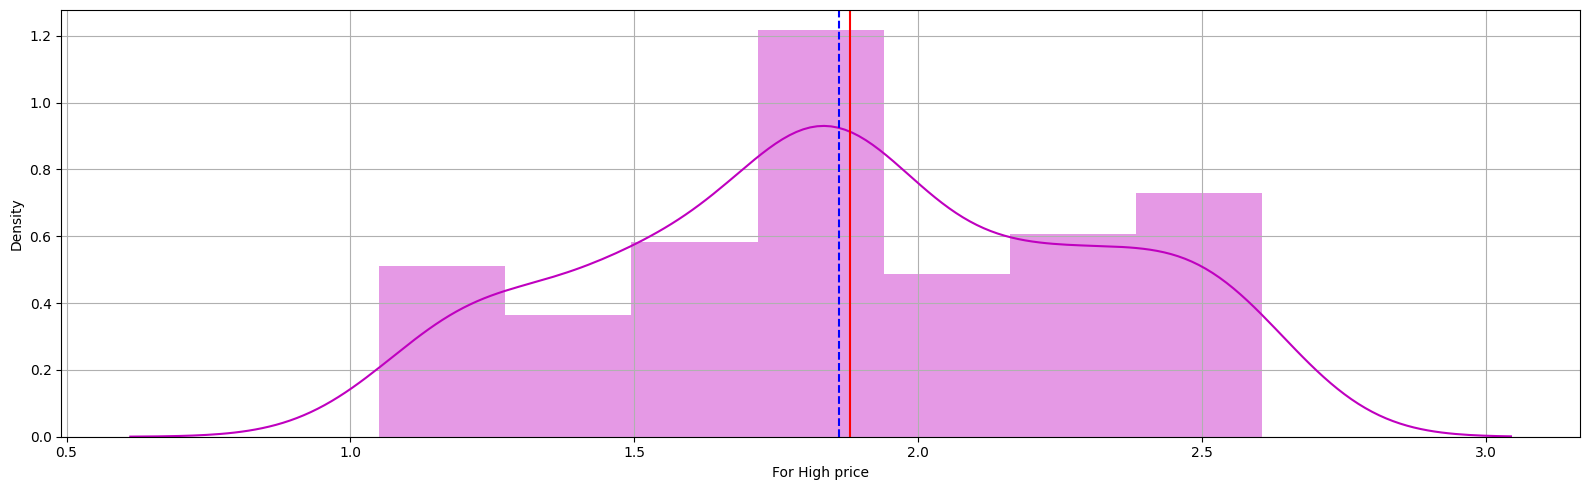

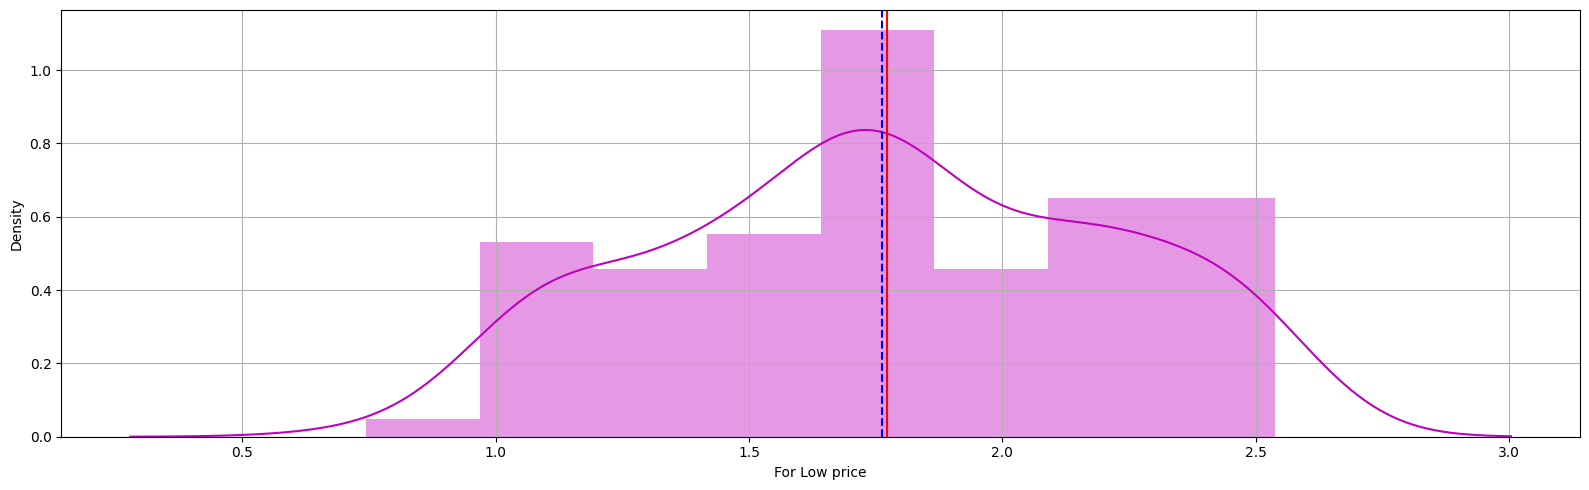

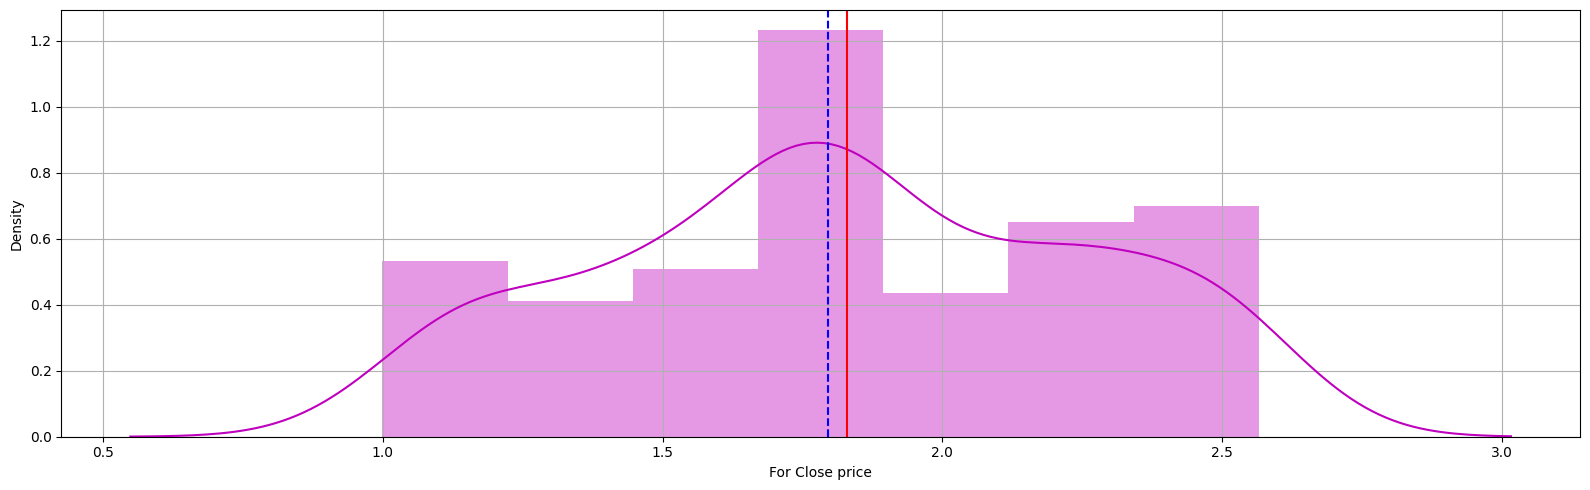

In [22]:
# Let's first transform the data to a normal distribution
# We will use the log transformation
for col in df.columns:
  plt.figure(figsize=(16,5))
  sns.distplot(np.log10(df[col]), color = 'm')
  plt.xlabel(f'For {col} price')
  plt.ylabel('Density')
  plt.axvline(np.log10(df[col]).mean(), color='red')                       # red line for mean
  plt.axvline(np.log10(df[col]).median(), color='blue', linestyle='--')    # blue for median
  plt.tight_layout()
  plt.grid()
  plt.show()

##### 1. Why did you pick the specific chart?

Again we use Distplot to show the normal distribution across the dataset.

##### 2. What is/are the insight(s) found from the chart?

1. Methods like Linear regression assumes the data to follow a normal distribution, so when data is positively skewed this assumption can lead to biased parameter estimates and incorrect hypothesis testing results.

2. Moreover a normal distribution can be beneficial for reasons like Better model fit, establish linear relationships, stablizing variance, equalizing outliers etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the above insights will help in creating a positive business impact.

#### Chart - 5 - Correlation Heatmap

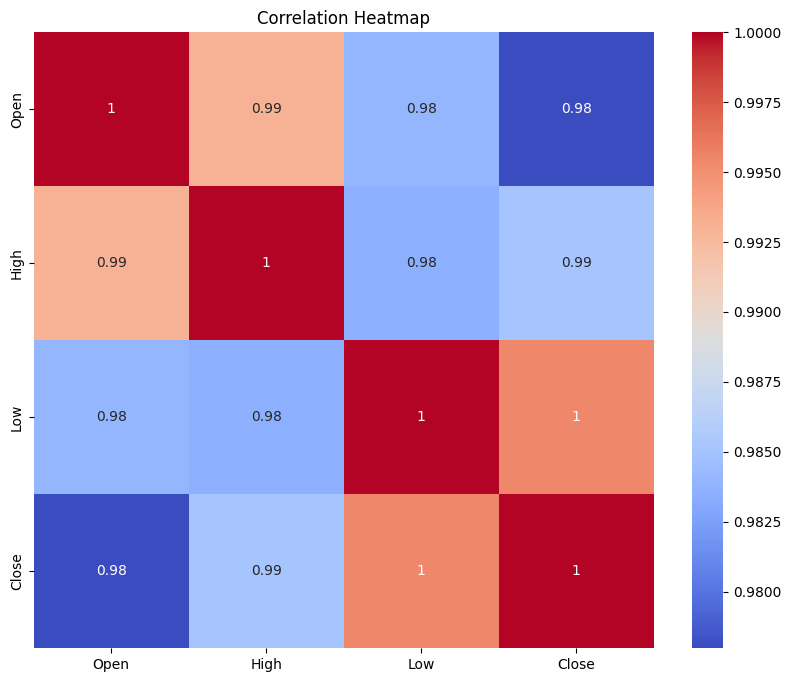

In [23]:
# Chart - 5 visualization code
corr_df = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
corr_df.columns
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap provides insights into the relationships between numeric variables in the DataFrame.

##### 2. What is/are the insight(s) found from the chart?

1. The strength of correlation can be indicated by the color fo the cell, the darker the color stronger the correlation and viceversa, Moreover Positive correlations are shown in warmer colors (e.g., red), while negative correlations are shown in cooler colors (e.g., blue).

2. The numbers in our heatmap are predominantly close to '1' indicating an extremely strong positive linear relationship meaning changes in one variable are almost perfectly predictive of changes in the other.

3. Moreover, 'Open' and 'Close' have negative correlation meaning when opening price is higher, the closing price tends to be lower and vice versa. Also, 'Low' and 'Close' have a positive correlation meaning, lowest price during the trading day has some influence on the closing price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes these insights will definitely help in making decisions related to trading to create positive impact on  business.

#### Bivariate Analysis

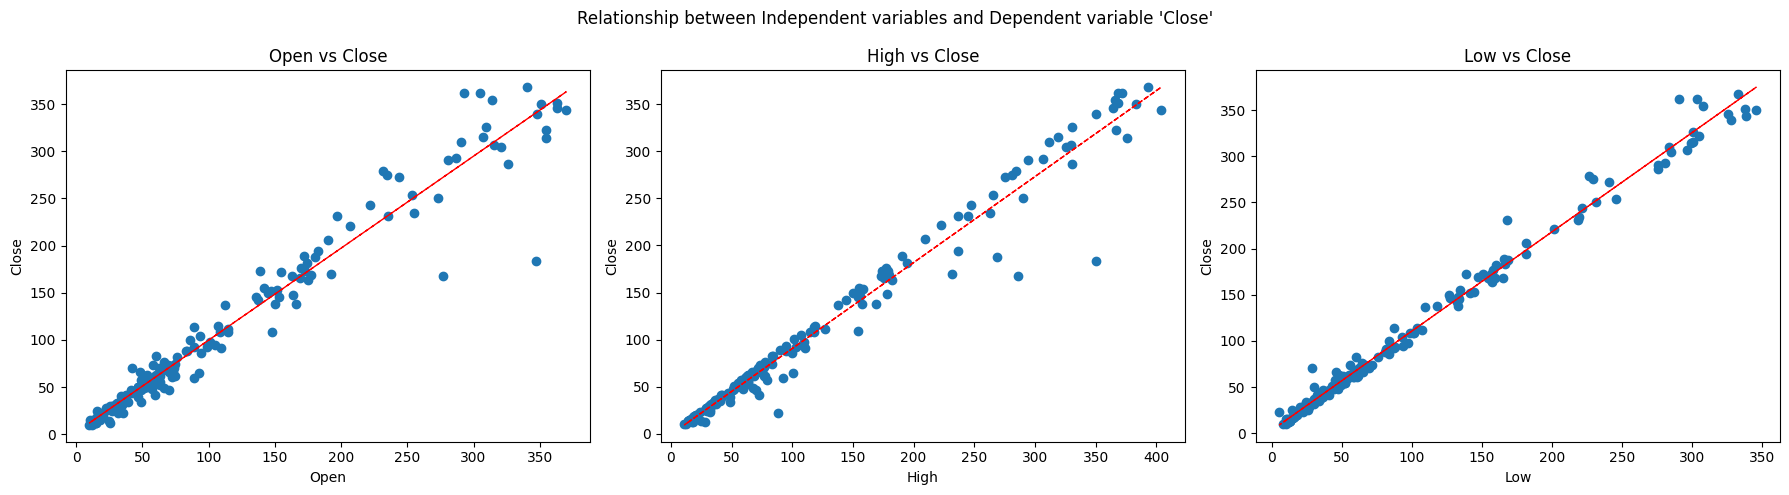

In [24]:
# Let's analyze more about the independent variables and dependent variable relation
independent_variables = df.describe().columns[:-1]
fig, axes = plt.subplots(1, len(independent_variables), figsize=(18,5))    # creating subplots
fig.suptitle("Relationship between Independent variables and Dependent variable 'Close'")  # adding a common title

for i, col in enumerate(independent_variables):     # iterating though independent variables
  ax = axes[i]
  ax.scatter(df[col], df['Close'])                  # for each variable 'col' creating a scatterplot
  ax.set_xlabel(col)
  ax.set_ylabel('Close')
  ax.set_title('{} vs Close'.format(col))           # set subtitles for each plot
  # Now we will fit a regression line
  z = np.polyfit(df[col], df['Close'], 1)           # this fits a polynomial of degree '1', corresponding to a straight line
  y_hat = np.poly1d(z)(df[col])                     # creates a polynomial fuction based on the coefficients 'z'
  ax.plot(df[col], y_hat, "r--", lw=1)              # plots the regression line, "r--" is the linestyle and "lw" is linewidth
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Scatterplots can reveal patterns or structures that may not be apparent in summary statistics or other types of visualizations.

##### 2. What is/are the insight(s) found from the chart?

1. We can clearly see that all of our independent variables are highly correlated to the dependent variable 'Close'.

2. Moreover, relationship between dependent variable and the independent variables is 'linear' in nature.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Understanding the linear relationships between market variables can help in the development of trading strategies. Plus they can provide insights into market trends and behavior and can help businesses assess the risk associated with their investments etc.

#### Chart - 7 - Pairplot

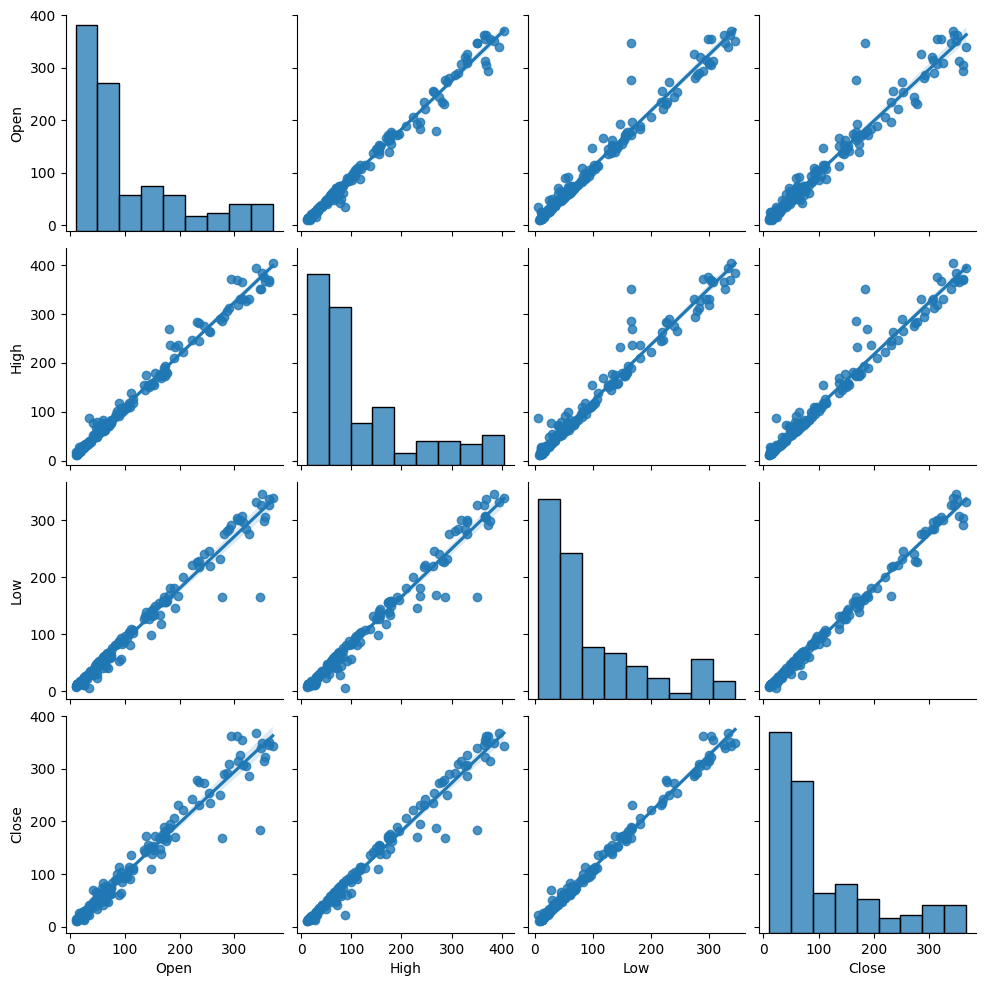

In [25]:
# Chart - 7 visualization code
cp = sns.color_palette('Set2')
sns.pairplot(df, kind='reg', palette=cp)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot  is helpful in exploring relationships between multiple variables in the dataset and even help identifying underlying patterns and groupings in data.

##### 2. What is/are the insight(s) found from the chart?

1. Independent variables are highly correlated to each other suggesting redundancy or 'multicollinearity' in data.

2. The pairplot also suggests our data to be right-skewed or positively skewed in nature and presence of possible outliers on the higher end of scale and might suggest need of applying transformation to data (like log transfromation).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help in improved decision making, risk management, optimized pricing, operational efficiency etc. creating a positive impact in business.

## ***5. Feature Engineering & Data Pre-processing***

Feature Engineering is to create new features that capture the same information but in a less correlated way in the dataset. This could involve combining or aggregating existing features of the dataset.

### 1. Handling Outliers

Our dataset is small, hence trying to handle outliers with 'Inter Quartile Range method' or 'z-score', will result in removal of many of our datapoints which is not good for our data (as I tried it firsthand), hence we will leave dataset as it is for the time being.

### 2. Categorical Encoding

'Categorical Encoding' is done when we have to convert a feature with non-numeric values to numeric valued data. Since our data has only one column containing non-numeric data 'Date' which we have already previously converted to index of dataset. There is no further need for categorical encoding in the dataset.

### 3. Multicollinearity

In [26]:
# importing necessary statistics library
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):             #calculating Variance Inflation Factor
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)
# vif result for [Open, High and Low] and [Close]
calc_vif(df[[i for i in df.describe().columns if i not in ['open', 'high', 'low']]])

,variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649



* ### Clearly, the values of VIF factor are very high meaning our independent and dependent variables have high degree of multicollinearity which might lead to unstable coefficient estimates and reduced interpretability of our regression model. However our dataset is small, multicollinearity is unavoidable, and anymore feature engineering might lead to loss of information. Hence we will now proceed and take measures when necessary. ###





#### 4. Feature Manipulation & Selection

In [27]:
independent_variables = ['Open','High', 'Low']
dependent_variable = ['Close']

#### 5. Data transformation

In [28]:
# applying log transformation to independent variables
x = np.log10(df[independent_variables]).values
# applying log transformation to dependent variable
y = np.log10(df[dependent_variable]).values

print(independent_variables)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


We used log transformation in order to deal with multicollinearity factor affecting the dataset.

# 6. ML Model Implementation

#### Data Splitting

In [29]:
# Split your data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=1)

##### What data splitting ratio have you used and why?

We have used 80-20% ratio as our datset is not very large, An 80% training data can potentially lead to a better-trained model with improved predictive performance and 20% testing data provides a reasonable amount of data to assess how well the model performs on unseen examples. Moreover an 80-20 split ratio is a common default in many machine learning libraries, making it a more familiar choice.

#### Data Scaling

In [30]:
# scaling the test data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Scaling the data is important as it helps avoiding numerical instabilities and make the coefficients or feature importances obtained from the model more interpretable and also can influence the impact of regularization on different features by ensuring it acts uniformly on all features.

# **Linear Regression**

In [31]:
# Model implementation
reg = LinearRegression()

#model fit
reg.fit(x_train, y_train)

# Predict on the model
y_pred = reg.predict(x_test)

##### Evaluation

In [32]:
def mape(actual, pred):
  # calculates Mean Absolute Percentage Error
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred)/actual)) * 100     # absolute percentage error

In [33]:
# evaluation metrics to assess the performance of regression on test data
MAE = mean_absolute_error(y_test, y_pred)   # calculates mean absolute error
print('Mean Absolute Error :', MAE)

MSE = mean_squared_error(y_test, y_pred)    # calculates mean squared error
print('Mean Squared Error :', MSE)

RMSE = np.sqrt(MSE)                         # calculates root mean squared error
print('Root Mean Squared Error :', RMSE)

MAPE = mape(y_test, y_pred)
print('Mean Absolute Percentage Error :', MAPE)

R2 = r2_score(y_test, y_pred)               # calculates r2 score
print(f"R2 Score : {R2}")

Adjusted_R2 = 1 - ((1 - R2) * (len(y_test) - 1) / (len(y_test) - x_train.shape[1] - 1))     # calculates adjusted r2 score
print(f"Adjusted R2 Score : {Adjusted_R2}")

Mean Absolute Error : 0.01988409842375775
Mean Squared Error : 0.0007103267830182622
Root Mean Squared Error : 0.026651956457608553
Mean Absolute Percentage Error : 1.3097452635769495
R2 Score : 0.9960093972428729
Adjusted R2 Score : 0.9956466151740431


The errors are relatively low, which is a positive sign of predictive accuracy.

In [34]:
# storing the evaluation metrics
i=0
error_df = pd.DataFrame()
# inserting errors in dataframe
error_df.loc[i, 'Model_name'] = 'Linear Regression'
error_df.loc[i, 'MAE'] = round(MAE,4)
error_df.loc[i, 'MSE'] = round(MSE,4)
error_df.loc[i, 'RMSE'] = round(RMSE,4)
error_df.loc[i, 'MAPE'] = round(MAPE,4)
error_df.loc[i, 'R2_Score'] = round(R2,4)
error_df.loc[i, 'Adjusted_R2'] = round(Adjusted_R2,4)
i+=1

####  Visualization

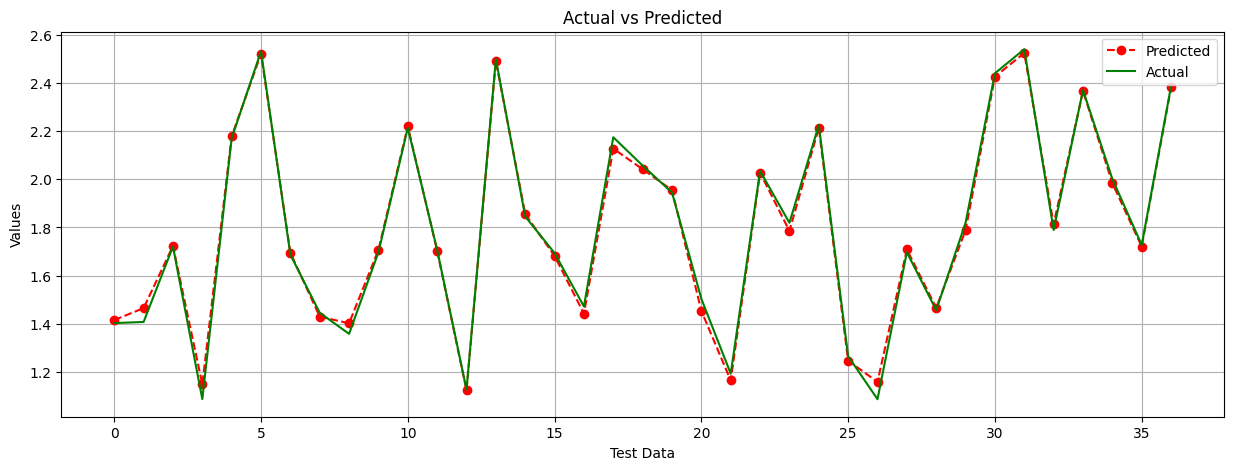

In [35]:
# let's plot a graph
plt.figure(figsize=(15,5))
# plotting predicted values in red
plt.plot(y_pred, label='Predicted', color='red', marker='o', linestyle='--')
# plotting actual values in green
plt.plot(np.array(y_test), label='Actual', color='green')
plt.legend()
plt.xlabel('Test Data')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

The close alignment of the actual and predicted values suggests that our linear regression model is a good fit for the data. Also that the relationship between the independent variables and the dependent variable is approximately linear.

# **Regularization**

The purpose of regularization in machine learning is to prevent overfitting and reduce the risk of multicollinearity, hence improving the performance of a model.

# 1. Lasso Regression (L1)

In [36]:
# Least Absolute Shrinkage and Selection Operator (LASSO)
# Initializing LASSO regression
lasso = Lasso(alpha=0.0001, max_iter = 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [37]:
# getting Intercept, coefficient  and score values
print('Intercept :',lasso.intercept_)
print('Coefficients :',lasso.coef_)
print(f'Score :{lasso.score(x_train, y_train)}')

Intercept : [0.87241338]
Coefficients : [-0.5821652   1.1197439   1.16320635]
Score :0.9944934599401819


#####  Cross-Validation & Hyperparameter Tuning

In [38]:
# Now let's start with the lasso regression model
lasso = Lasso()
# let's define a range of alpha values for hyperparameter tuning
alphas = [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 0.005, 0.006, 0.007, 0.010, 0.015, 0.020, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]
# setting up parameter grid
param_grid = {'alpha': alphas}
# creating a GridSearchCV  and fitting on training data
lasso_regressor = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
# model fit
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [39]:
# predicting on the test dataset
y_pred_lasso = lasso_regressor.predict(x_test)
print(y_pred_lasso)

[1.41625605 1.46556768 1.72327969 1.15012804 2.17761584 2.52043341
 1.69508327 1.43042859 1.4026327  1.70698054 2.21956059 1.70322915
 1.12424811 2.49018227 1.85525186 1.68198696 1.44271455 2.12708237
 2.0416805  1.95491751 1.45405602 1.16553766 2.02711767 1.78567135
 2.21315739 1.24714394 1.15948944 1.70876151 1.46708486 1.78895603
 2.42540928 2.52356468 1.81349827 2.36644775 1.98400074 1.72074248
 2.38075072]


##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV as it is used for hyperparameter tuning in machine learning. It systematically searches through a predefined set of hyperparameter values to find the combination that optimizes a model's performance. It combines hyperparameter search with cross-validation to avoid overfitting and efficiently discover the best hyperparameters for a given model.

In [40]:
# let's check the performance using evaluation metrics
MAE_lasso = round(mean_absolute_error(10**(y_test), 10**(y_pred_lasso)),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso = round(mean_squared_error(10**(y_test), 10**(y_pred_lasso)),4)
print(f"Mean Squared Error : {MSE_lasso}")

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print(f"Root Mean Squared Error : {RMSE_lasso}")

R2_lasso = round(r2_score(10**(y_test), 10**(y_pred_lasso)),4)
print(f"R2 Score : {R2_lasso}")

MAPE_lasso = round(mape(10**(y_test), 10**(y_pred_lasso)),4)
print(f"Mean Absolute Percentage Error : {MAPE_lasso}")

Adjusted_R2_lasso = round(1-(1 - r2_score(10**(y_test), 10**(y_pred_lasso))) * ((x_test.shape[0]-1)/(x_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_lasso}")

Mean Absolute Error : 3.1675
Mean Squared Error : 20.6179
Root Mean Squared Error : 4.5407
R2 Score : 0.9978
Mean Absolute Percentage Error : 194.0904
Adjusted R2 Score : 0.9599


Overall, the Lasso Regression model appears to perform very well based on these metrics. It has low MAE, MSE, and RMSE, indicating accurate predictions, a high R2 score demonstrating good explanatory power, and a reasonable Adjusted R2 score. However, the relatively high MAPE suggests that the model may have occasional large prediction errors.

In [41]:
# updating lasso values in 'error_df' dataframe
error_df.loc[i,'Model_name']='Lasso regression'
error_df.loc[i,'MAE']=round(MAE_lasso,4)
error_df.loc[i,'MSE']=round(MSE_lasso,4)
error_df.loc[i,'RMSE']=round(RMSE_lasso,4)
error_df.loc[i,'MAPE']=round(MAPE_lasso,4)
error_df.loc[i, 'R2_Score'] = round(R2_lasso,4)
error_df.loc[i, 'Adjusted_R2'] = round(Adjusted_R2_lasso,4)
i=i+1

####  Visualization

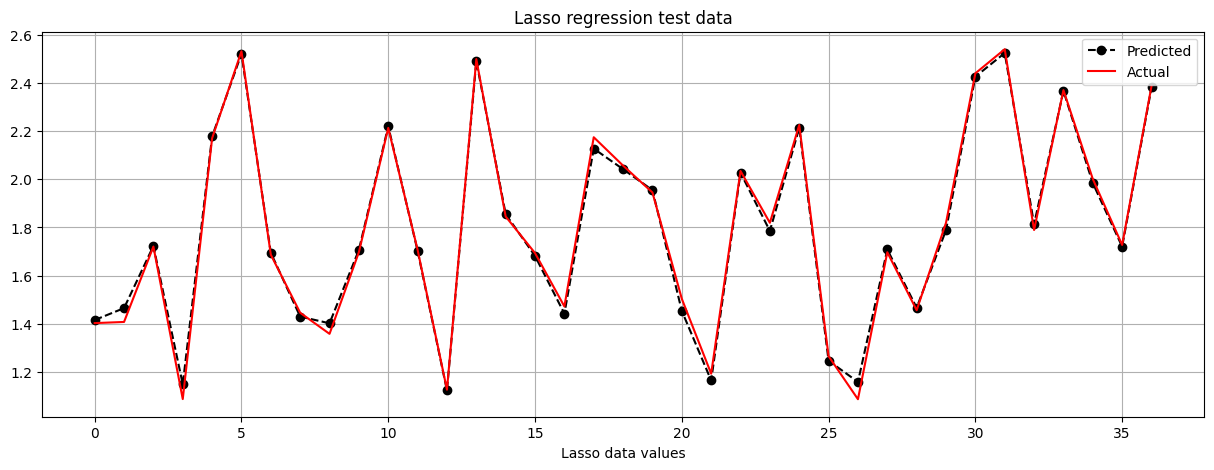

In [42]:
# let's plot a graph
plt.figure(figsize=(15,5))
plt.plot(y_pred_lasso, label='Predicted', color='black', marker='o', linestyle='--')
plt.plot(np.array(y_test), label='Actual', color='red')
plt.legend()
plt.xlabel('Lasso data values')
plt.title('Lasso regression test data')
plt.grid()
plt.show()

The close alignment of the actual and predicted values suggests that our lasso regression model is a good fit for the data. Also that the relationship between the independent variables and the dependent variable is approximately linear.

# 2. Ridge Regression (L2)

In [43]:
# initializing Ridge regression
ridge = Ridge(alpha=0.001,max_iter=3000)
ridge.fit(x_train,y_train)

Ridge(alpha=0.001, max_iter=3000)

In [44]:
print('Intercept :', ridge.intercept_)
print('Coefficients :', ridge.coef_)
print(f"Score : {ridge.score(x_train,y_train)}")

Intercept : [0.8591293]
Coefficients : [[-0.85830213  1.31448995  1.25976425]]
Score : 0.9948360799749996


Cross validation and Hyperparameter tuning

In [45]:
# model fiiting
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=5, scoring='neg_mean_squared_error')
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [46]:
print('Parameter :',ridge_regressor.best_params_)
print('Best score :',ridge_regressor.best_score_)

Parameter : {'alpha': 0.001}
Best score : -0.0010647564120942774


In [47]:
# predicting on the test dataset
y_pred_ridge = ridge_regressor.predict(x_test)

In [48]:
# let's check the performance using evaluation metrics
MAE_ridge = round(mean_absolute_error(10**(y_test), 10**(y_pred_ridge)),4)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge = round(mean_squared_error(10**(y_test), 10**(y_pred_ridge)),4)
print(f"Mean Squared Error : {MSE_ridge}")

RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print(f"Root Mean Squared Error : {RMSE_ridge}")

R2_ridge = round(r2_score(10**(y_test), 10**(y_pred_ridge)),4)
print(f"R2 Score : {R2_ridge}")

MAPE_ridge = round(mape(10**(y_test), 10**(y_pred_ridge)),4)
print(f"Mean Absolute Percentage Error : {MAPE_ridge}")

Adjusted_R2_ridge = round(1-(1 - r2_score(10**(y_test), 10**(y_pred_ridge))) * ((x_test.shape[0]-1)/(x_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_ridge}")

Mean Absolute Error : 3.1859
Mean Squared Error : 20.6574
Root Mean Squared Error : 4.545
R2 Score : 0.9978
Mean Absolute Percentage Error : 4.6446
Adjusted R2 Score : 0.9598


Overall, the Ridge Regression model appears to perform very well based on these metrics. It has low MAE, MSE, and RMSE, indicating accurate predictions, a high R2 score demonstrating good explanatory power, and a low MAPE suggesting good relative accuracy. The Adjusted R2 score also indicates a reasonable balance between model fit and complexity. This suggests that the Ridge Regression model is a strong candidate for making predictions on your data.

In [49]:
# updating ridge values in 'error_df' dataframe
error_df.loc[i,'Model_name']='Ridge regression'
error_df.loc[i,'MAE']=round(MAE_ridge,4)
error_df.loc[i,'MSE']=round(MSE_ridge,4)
error_df.loc[i,'RMSE']=round(RMSE_ridge,4)
error_df.loc[i,'MAPE']=round(MAPE_ridge,4)
error_df.loc[i, 'R2_Score'] = round(R2_ridge,4)
error_df.loc[i, 'Adjusted_R2'] = round(Adjusted_R2_ridge,4)
i=i+1

####  Visualization

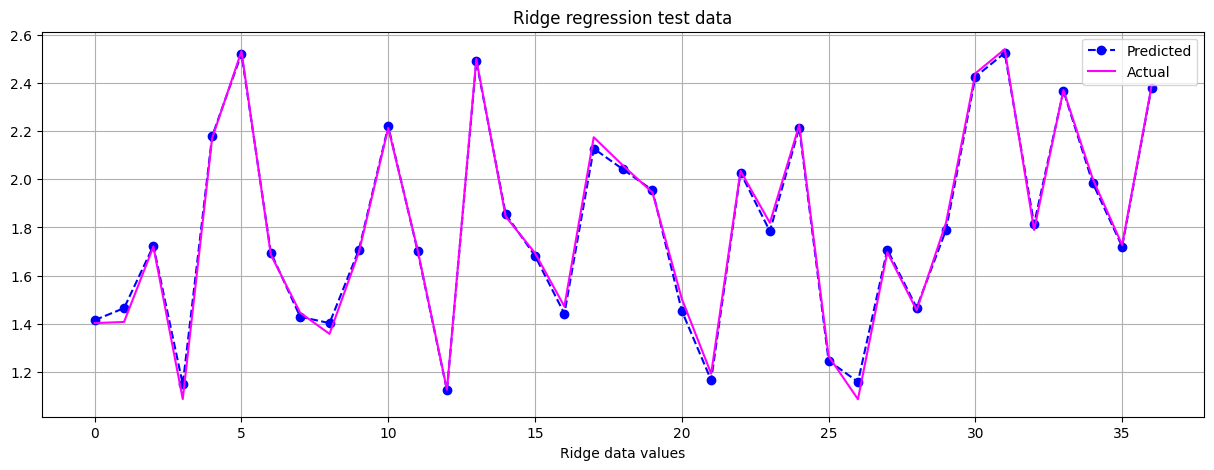

In [50]:
# let's plot a graph
plt.figure(figsize=(15,5))
plt.plot(y_pred_ridge, label='Predicted', color='blue', marker='o', linestyle='--')
plt.plot(np.array(y_test), label='Actual', color='magenta')
plt.legend()
plt.xlabel('Ridge data values')
plt.title('Ridge regression test data')
plt.grid()
plt.show()

The close alignment of the actual and predicted values suggests that our ridge regression model is a good fit for the data. Also that the relationship between the independent variables and the dependent variable is approximately linear.

# 3. ElasticNet Regression

In [51]:
# Model implementation
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# model fit
elastic_net.fit(x_train, y_train)

# predict on the model
y_pred_elasticnet = elastic_net.predict(x_test)

In [52]:
# getting Intercept, coefficient and score values
print('Intercept :',elastic_net.intercept_)
print('Coefficients :',elastic_net.coef_)
print(f'Score : {elastic_net.score(x_train,y_train)}')

Intercept : [1.44942212]
Coefficients : [0.27504729 0.25700468 0.17563115]
Score : 0.6756860756868064


####  Cross- Validation & Hyperparameter Tuning

In [53]:
# model fitting
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
# initializing parameter grid
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
# cross validation with GridSearchCV
elasticnet_regressor = GridSearchCV(elasticnet_model, elastic_net_param_grid, cv=5, scoring='neg_mean_squared_error')
elasticnet_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [54]:
print('Parameters :',elasticnet_regressor.best_params_)
print('Best score :',elasticnet_regressor.best_score_)

Parameters : {'alpha': 1e-05, 'l1_ratio': 0.1}
Best score : -0.001064818746105752


In [55]:
# predicting on the model
y_pred_elasticnet = elasticnet_regressor.predict(x_test)

In [56]:
# let's check the performance using evaluation metrics
MAE_elasticnet = round(mean_absolute_error(10**(y_test), 10**(y_pred_elasticnet)),4)
print(f"Mean Absolute Error : {MAE_elasticnet}")

MSE_elasticnet = round(mean_squared_error(10**(y_test), 10**(y_pred_elasticnet)),4)
print(f"Mean Squared Error : {MSE_elasticnet}")

RMSE_elasticnet = round(np.sqrt(MSE_elasticnet),4)
print(f"Root Mean Squared Error : {RMSE_elasticnet}")

R2_elasticnet = round(r2_score(10**(y_test), 10**(y_pred_elasticnet)),4)
print(f"R2 Score : {R2_elasticnet}")

MAPE_elasticnet = round(mape(10**(y_test), 10**(y_pred_elasticnet)),4)
print(f"Mean Absolute Percentage Error : {MAPE_elasticnet}")

Adjusted_R2_elasticnet = round(1-(1 - r2_score(10**(y_test), 10**(y_pred_elasticnet))) * ((x_test.shape[0]-1)/(x_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_elasticnet}")

Mean Absolute Error : 3.1945
Mean Squared Error : 20.6809
Root Mean Squared Error : 4.5476
R2 Score : 0.9978
Mean Absolute Percentage Error : 194.0924
Adjusted R2 Score : 0.9598


Overall, the ElasticNet Regression model performs well in terms of traditional metrics like MAE, MSE, RMSE, and R2 Score, indicating accurate predictions and good explanatory power. However, the relatively high MAPE suggests that the model may have occasional large prediction errors, which should be considered depending on the specific context and requirements of your application. The Adjusted R2 score also indicates a reasonable balance between model fit and complexity.

In [57]:
# updating lasso values in 'error_df' dataframe
error_df.loc[i,'Model_name']='Elasticnet regression'
error_df.loc[i,'MAE']=round(MAE_elasticnet,4)
error_df.loc[i,'MSE']=round(MSE_elasticnet,4)
error_df.loc[i,'RMSE']=round(RMSE_elasticnet,4)
error_df.loc[i,'MAPE']=round(MAPE_elasticnet,4)
error_df.loc[i, 'R2_Score'] = round(R2_elasticnet,4)
error_df.loc[i, 'Adjusted_R2'] = round(Adjusted_R2_elasticnet,4)
i=i+1

####  Visualization

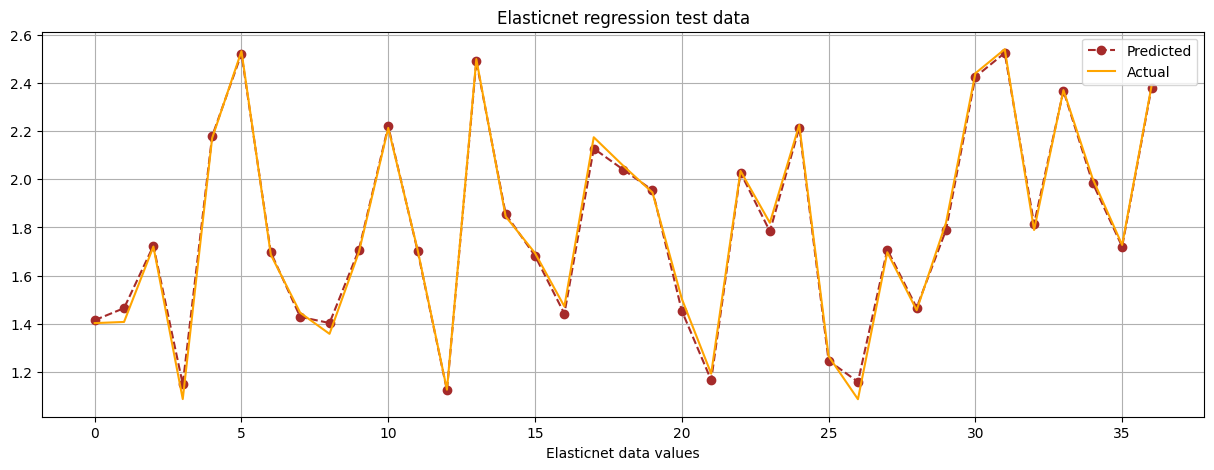

In [58]:
# let's plot a graph
plt.figure(figsize=(15,5))
plt.plot(y_pred_elasticnet, label='Predicted', color='brown', marker='o', linestyle='--')
plt.plot(np.array(y_test), label='Actual', color='orange')
plt.legend()
plt.xlabel('Elasticnet data values')
plt.title('Elasticnet regression test data')
plt.grid()
plt.show()

The close alignment of the actual and predicted values suggests that our elasticnet regression model is a good fit for the data. Also that the relationship between the independent variables and the dependent variable is approximately linear.

# **Decision Tree**

In [59]:
# Model implementation
regressor_DT = DecisionTreeRegressor(random_state=0)

# model fit
regressor_DT.fit(x_train, y_train)

# predict on the model
y_pred_DT = regressor_DT.predict(x_test)

In [60]:
# let's check the performance using evaluation metrics
MAE_DT = round(mean_absolute_error(10**(y_test), 10**(y_pred_DT)),4)
print(f"Mean Absolute Error : {MAE_DT}")

MSE_DT = round(mean_squared_error(10**(y_test), 10**(y_pred_DT)),4)
print(f"Mean Squared Error : {MSE_DT}")

RMSE_DT = round(np.sqrt(MSE_DT),4)
print(f"Root Mean Squared Error : {RMSE_DT}")

R2_DT = round(r2_score(10**(y_test), 10**(y_pred_DT)),4)
print(f"R2 Score : {R2_DT}")

MAPE_DT = round(mape(10**(y_test), 10**(y_pred_DT)),4)
print(f"Mean Absolute Percentage Error : {MAPE_DT}")

Adjusted_R2_DT = round(1-(1 - r2_score(10**(y_test), 10**(y_pred_DT))) * ((x_test.shape[0]-1)/(x_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_DT}")

Mean Absolute Error : 5.2792
Mean Squared Error : 63.8273
Root Mean Squared Error : 7.9892
R2 Score : 0.9931
Mean Absolute Percentage Error : 197.887
Adjusted R2 Score : 0.8759


Overall, the Decision Tree model performs well in terms of traditional metrics like MAE, MSE, RMSE, and R2 Score, indicating reasonably accurate predictions and good explanatory power. However, the relatively high MAPE suggests that the model may have occasional large prediction errors. The Adjusted R2 score also suggests the possibility of overfitting, which can be addressed through hyperparameter tuning or other regularization techniques.

In [61]:
# updating Decision tree values in 'error_df' dataframe
error_df.loc[i,'Model_name']='Decision Tree'
error_df.loc[i,'MAE']=round(MAE_DT,4)
error_df.loc[i,'MSE']=round(MSE_DT,4)
error_df.loc[i,'RMSE']=round(RMSE_DT,4)
error_df.loc[i,'MAPE']=round(MAPE_DT,4)
error_df.loc[i, 'R2_Score'] = round(R2_DT,4)
error_df.loc[i, 'Adjusted_R2'] = round(Adjusted_R2_DT,4)
i=i+1

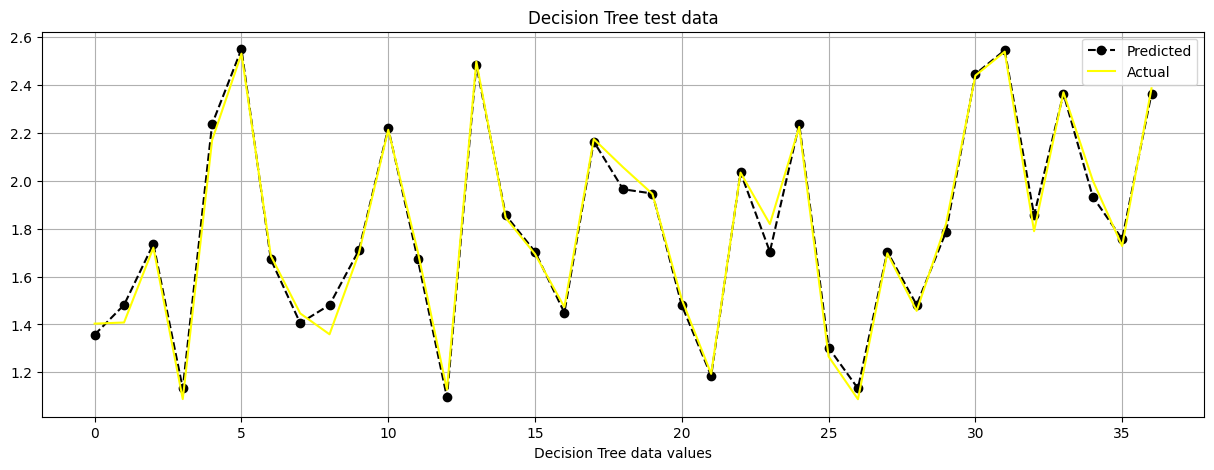

In [62]:
# let's plot a graph
plt.figure(figsize=(15,5))
plt.plot(y_pred_DT, label='Predicted', color='black', marker='o', linestyle='--')
plt.plot(np.array(y_test), label='Actual', color='yellow')
plt.legend()
plt.xlabel('Decision Tree data values')
plt.title('Decision Tree test data')
plt.grid()
plt.show()

The close alignment of the actual and predicted values suggests that our Decision tree model is a good fit for the data. Also that the relationship between the independent variables and the dependent variable is approximately linear.

# **Random Forest**

In [63]:
# Model implementation
regressor_rf = RandomForestRegressor(n_estimators=1000, random_state=5)

#model fit
regressor_rf.fit(x_train, y_train)

# predict on the model
y_pred_rf = regressor_rf.predict(x_test)

In [64]:
# let's check the performance using evaluation metrics
MAE_rf = round(mean_absolute_error(10**(y_test), 10**(y_pred_rf)),4)
print(f"Mean Absolute Error : {MAE_rf}")

MSE_rf = round(mean_squared_error(10**(y_test), 10**(y_pred_rf)),4)
print(f"Mean Squared Error : {MSE_rf}")

RMSE_rf = round(np.sqrt(MSE_rf),4)
print(f"Root Mean Squared Error : {RMSE_rf}")

R2_rf = round(r2_score(10**(y_test), 10**(y_pred_rf)),4)
print(f"R2 Score : {R2_rf}")

MAPE_rf = round(mape(10**(y_test), 10**(y_pred_rf)),4)
print(f"Mean Absolute Percentage Error : {MAPE_rf}")

Adjusted_R2_rf = round(1-(1 - r2_score(10**(y_test), 10**(y_pred_rf))) * ((x_test.shape[0]-1)/(x_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_rf}")

Mean Absolute Error : 4.1485
Mean Squared Error : 37.3712
Root Mean Squared Error : 6.1132
R2 Score : 0.996
Mean Absolute Percentage Error : 197.9779
Adjusted R2 Score : 0.9274


Overall, the Random Forest Regressor model performs exceptionally well in terms of traditional metrics like MAE, MSE, RMSE, and R2 Score, indicating accurate predictions and excellent explanatory power. However, the relatively high MAPE suggests that the model may have occasional large prediction errors. The Adjusted R2 score also suggests some potential overfitting, which can be addressed through hyperparameter tuning or other regularization techniques.

In [65]:
# updating Decision tree values in 'error_df' dataframe
error_df.loc[i,'Model_name']='Random Forest'
error_df.loc[i,'MAE']=round(MAE_rf,4)
error_df.loc[i,'MSE']=round(MSE_rf,4)
error_df.loc[i,'RMSE']=round(RMSE_rf,4)
error_df.loc[i,'MAPE']=round(MAPE_rf,4)
error_df.loc[i, 'R2_Score'] = round(R2_rf,4)
error_df.loc[i, 'Adjusted_R2'] = round(Adjusted_R2_rf,4)
i=i+1

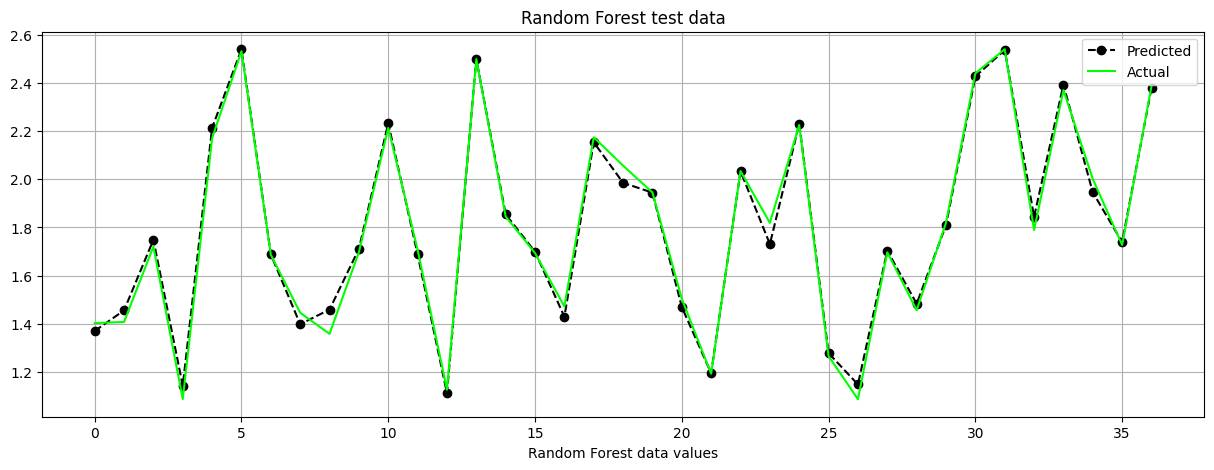

In [66]:
# let's plot a graph
plt.figure(figsize=(15,5))
plt.plot(y_pred_rf, label='Predicted', color='black', marker='o', linestyle='--')
plt.plot(np.array(y_test), label='Actual', color='lime')
plt.legend()
plt.xlabel('Random Forest data values')
plt.title('Random Forest test data')
plt.grid()
plt.show()

The close alignment of the actual and predicted values suggests that our Random Forest Regressor model is a good fit for the data. Also that the relationship between the independent variables and the dependent variable is approximately linear.

# **K-NN Regressor**

In [67]:
# model implementation
k_values = [2,3,4,5,6,7,8,9]
knn_models = {}
for k in k_values:
  regressor_knn = KNeighborsRegressor(n_neighbors=k)
  knn_models[k] = regressor_knn

# model fit
regressor_knn.fit(x_train, y_train)

# predict on the model
y_pred_knn = regressor_knn.predict(x_test)

In [68]:
# let's check the performance using evaluation metrics
MAE_knn = round(mean_absolute_error(10**(y_test), 10**(y_pred_knn)),4)
print(f"Mean Absolute Error : {MAE_rf}")

MSE_knn = round(mean_squared_error(10**(y_test), 10**(y_pred_knn)),4)
print(f"Mean Squared Error : {MSE_knn}")

RMSE_knn = round(np.sqrt(MSE_knn),4)
print(f"Root Mean Squared Error : {RMSE_knn}")

R2_knn = round(r2_score(10**(y_test), 10**(y_pred_knn)),4)
print(f"R2 Score : {R2_knn}")

MAPE_knn = round(mape(10**(y_test), 10**(y_pred_knn)),4)
print(f"Mean Absolute Percentage Error : {MAPE_knn}")

Adjusted_R2_knn = round(1-(1 - r2_score(10**(y_test), 10**(y_pred_knn))) * ((x_test.shape[0]-1)/(x_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_knn}")

Mean Absolute Error : 4.1485
Mean Squared Error : 38.1586
Root Mean Squared Error : 6.1773
R2 Score : 0.9959
Mean Absolute Percentage Error : 6.9178
Adjusted R2 Score : 0.9258


Overall, the K-Neighbors Regressor model performs very well in terms of traditional metrics like MAE, MSE, RMSE, and R2 Score, indicating accurate predictions and excellent explanatory power. The relatively low MAPE suggests good relative accuracy in predictions. However, the Adjusted R2 score suggests some potential overfitting, which can be addressed through hyperparameter tuning or other regularization techniques if necessary.

In [69]:
# updating Decision tree values in 'error_df' dataframe
error_df.loc[i,'Model_name']='K-Neighbors Regressor'
error_df.loc[i,'MAE']=round(MAE_knn,4)
error_df.loc[i,'MSE']=round(MSE_knn,4)
error_df.loc[i,'RMSE']=round(RMSE_knn,4)
error_df.loc[i,'MAPE']=round(MAPE_knn,4)
error_df.loc[i, 'R2_Score'] = round(R2_knn,4)
error_df.loc[i, 'Adjusted_R2'] = round(Adjusted_R2_knn,4)
i=i+1

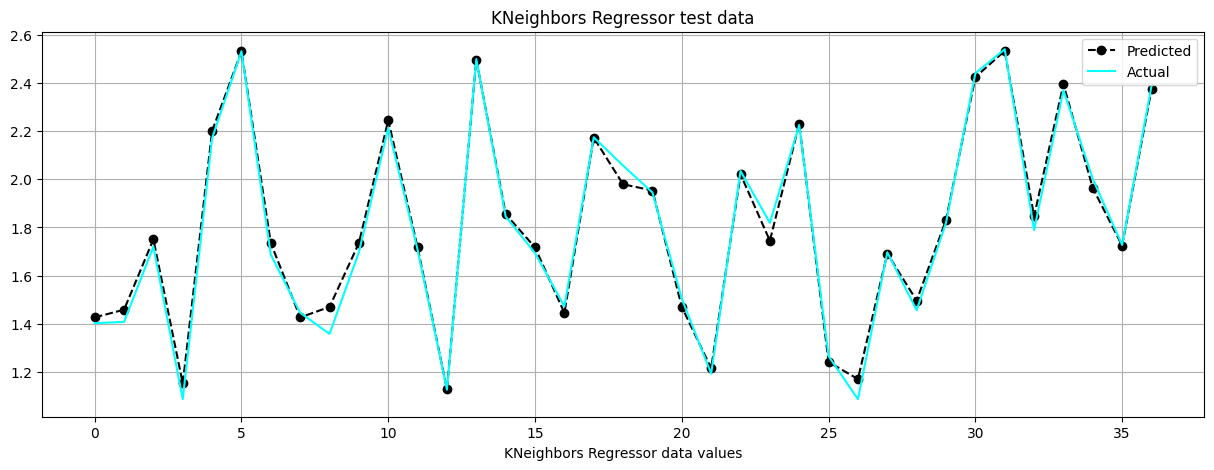

In [70]:
# let's plot a graph
plt.figure(figsize=(15,5))
plt.plot(y_pred_knn, label='Predicted', color='black', marker='o', linestyle='--')
plt.plot(np.array(y_test), label='Actual', color='cyan')
plt.legend()
plt.xlabel('KNeighbors Regressor data values')
plt.title('KNeighbors Regressor test data')
plt.grid()
plt.show()

The close alignment of the actual and predicted values suggests that our KNeighbors Regressor model is a good fit for the data. Also that the relationship between the independent variables and the dependent variable is approximately linear.

# **Support Vector Regressor**

In [74]:
# setting parameters
kernel_values = ['linear', 'rbf', 'poly']
C_values = [0.1, 1, 10]
epsilon_values = [0.01, 0.1, 1]

from itertools import product

# model implementation
for kernel, C, epsilon in product(kernel_values, C_values, epsilon_values):
  regressor_svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
  # model fit
  regressor_svr.fit(x_train, y_train)
  # predict on the model
  y_pred_svr = regressor_svr.predict(x_test)

In [75]:
# let's check the performance using evaluation metrics
MAE_svr = round(mean_absolute_error(10**(y_test), 10**(y_pred_svr)),4)
print(f"Mean Absolute Error : {MAE_svr}")

MSE_svr = round(mean_squared_error(10**(y_test), 10**(y_pred_svr)),4)
print(f"Mean Squared Error : {MSE_svr}")

RMSE_svr = round(np.sqrt(MSE_svr),4)
print(f"Root Mean Squared Error : {RMSE_svr}")

R2_svr = round(r2_score(10**(y_test), 10**(y_pred_svr)),4)
print(f"R2 Score : {R2_svr}")

MAPE_svr = round(mape(10**(y_test), 10**(y_pred_svr)),4)
print(f"Mean Absolute Percentage Error : {MAPE_svr}")

Adjusted_R2_svr = round(1-(1 - r2_score(10**(y_test), 10**(y_pred_svr))) * ((x_test.shape[0]-1)/(x_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_svr}")

Mean Absolute Error : 67.5234
Mean Squared Error : 10759.4845
Root Mean Squared Error : 103.7279
R2 Score : -0.162
Mean Absolute Percentage Error : 96.4844
Adjusted R2 Score : -19.9162


Based on these metrics, the Support Vector Regressor model's performance appears to be very poor for the given dataset. It has high errors (MAE, MSE, RMSE) and negative R2 and Adjusted R2 scores, indicating a lack of fit to the data. Additionally, the MAPE suggests that the model's predictions have relatively high errors in percentage terms.

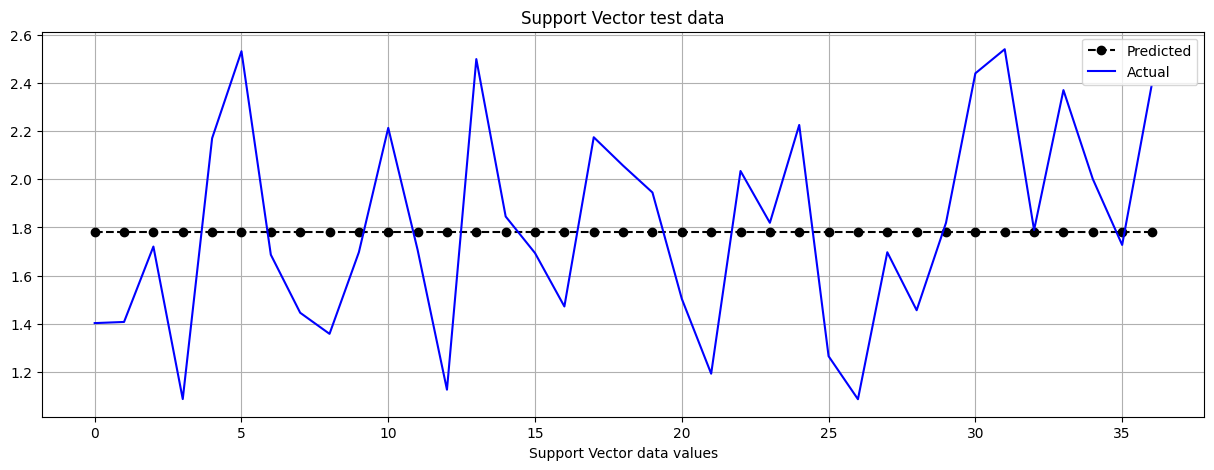

In [76]:
# let's plot a graph
plt.figure(figsize=(15,5))
plt.plot(y_pred_svr, label='Predicted', color='black', marker='o', linestyle='--')
plt.plot(np.array(y_test), label='Actual', color='blue')
plt.legend()
plt.xlabel('Support Vector data values')
plt.title('Support Vector test data')
plt.grid()
plt.show()

From the plot it is very clear that Support Vector Regressor model is not at all a good fit for our dataset for prediction.

# **XGBoost Regressor**

In [77]:
# model implementation
xgboost_regressor = xgb.XGBRegressor(objectives='reg:squarederror', n_estimator=100, learning_rate=0.1, max_depth=3, random_state=42)

# model fit
xgboost_regressor.fit(x_train, y_train)

# predict on the model
y_pred_xgb = xgboost_regressor.predict(x_test)

In [78]:
# let's check the performance using evaluation metrics
MAE_xgb = round(mean_absolute_error(10**(y_test), 10**(y_pred_xgb)),4)
print(f"Mean Absolute Error : {MAE_rf}")

MSE_xgb = round(mean_squared_error(10**(y_test), 10**(y_pred_xgb)),4)
print(f"Mean Squared Error : {MSE_xgb}")

RMSE_xgb = round(np.sqrt(MSE_xgb),4)
print(f"Root Mean Squared Error : {RMSE_xgb}")

R2_xgb = round(r2_score(10**(y_test), 10**(y_pred_xgb)),4)
print(f"R2 Score : {R2_xgb}")

MAPE_xgb = round(mape(10**(y_test), 10**(y_pred_xgb)),4)
print(f"Mean Absolute Percentage Error : {MAPE_xgb}")

Adjusted_R2_xgb = round(1-(1 - r2_score(10**(y_test), 10**(y_pred_xgb))) * ((x_test.shape[0]-1)/(x_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_xgb}")

Mean Absolute Error : 4.1485
Mean Squared Error : 47.0453
Root Mean Squared Error : 6.859
R2 Score : 0.9949
Mean Absolute Percentage Error : 193.091
Adjusted R2 Score : 0.9085


Overall, the XGBoost Regressor model performs very well in terms of traditional metrics like MAE, MSE, RMSE, and R2 Score, indicating accurate predictions and excellent explanatory power. However, the relatively high MAPE suggests that the model may have occasional large prediction errors. The Adjusted R2 score suggests some potential overfitting, which can be addressed through hyperparameter tuning or other regularization techniques if necessary.

In [79]:
# updating Decision tree values in 'error_df' dataframe
error_df.loc[i,'Model_name']='XGBoost Regressor'
error_df.loc[i,'MAE']=round(MAE_xgb,4)
error_df.loc[i,'MSE']=round(MSE_xgb,4)
error_df.loc[i,'RMSE']=round(RMSE_xgb,4)
error_df.loc[i,'MAPE']=round(MAPE_xgb,4)
error_df.loc[i, 'R2_Score'] = round(R2_xgb,4)
error_df.loc[i, 'Adjusted_R2'] = round(Adjusted_R2_xgb,4)
i=i+1

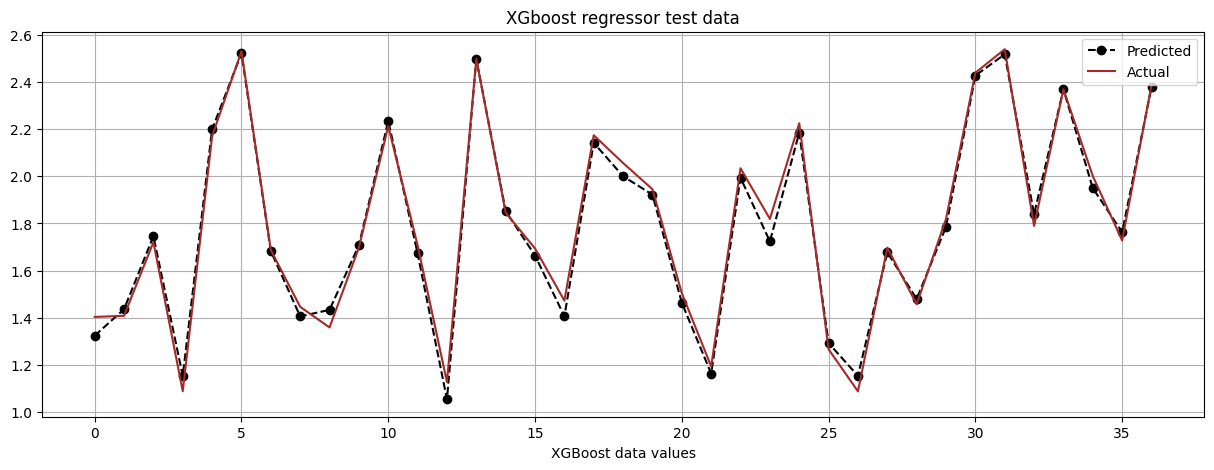

In [80]:
# let's plot a graph for xgboost regressor
plt.figure(figsize=(15,5))
plt.plot(y_pred_xgb, label='Predicted', color='black', marker='o', linestyle='--')
plt.plot(np.array(y_test), label='Actual', color='brown')
plt.legend()
plt.xlabel('XGBoost data values')
plt.title('XGboost regressor test data')
plt.grid()
plt.show()

The close alignment of the actual and predicted values suggests that our XGBoost Regressor model is a good fit for the data. Also that the relationship between the independent variables and the dependent variable is approximately linear.

## Final Evaluation metric chart for various models implemeted

In [81]:
error_df

,Model_name,MAE,MSE,RMSE,MAPE,R2_Score,Adjusted_R2
0,Linear Regression,0.0199,0.0007,0.0267,1.3097,0.9960,0.9956
1,Lasso regression,3.1675,20.6179,4.5407,194.0904,0.9978,0.9599
2,Ridge regression,3.1859,20.6574,4.5450,4.6446,0.9978,0.9598
3,Elasticnet regression,3.1945,20.6809,4.5476,194.0924,0.9978,0.9598
4,Decision Tree,5.2792,63.8273,7.9892,197.8870,0.9931,0.8759
5,Random Forest,4.1485,37.3712,6.1132,197.9779,0.9960,0.9274
6,K-Neighbors Regressor,4.3934,38.1586,6.1773,6.9178,0.9959,0.9258
7,XGBoost Regressor,5.2515,47.0453,6.8590,193.0910,0.9949,0.9085


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The metrics which we used for performance evaluation of machine learning models are:
1. Mean Absolute Error (MAE) : A measure of the average absolute difference between the model's predictions and the actual values. It provides insight into the magnitude of errors made by the model.
2. Mean Squared Error (MSE) : A measure of the average squared difference between the model's predictions and the actual values. It gives more weight to larger errors and can help identify outliers.
3. Root Mean Squared Error (RMSE) : The square root of MSE, which is often used to provide an interpretable measure of the average absolute error. It is in the same units as the target variable.
4. Mean Absolute Percentage Error (MAPE) : A percentage-based metric that measures the relative accuracy of predictions. It calculates the average percentage difference between predicted and actual values.
5. R2 Score (Coefficient of Determination) : A measure of how well the model explains the variance in the target variable. It ranges from 0 to 1, with higher values indicating a better fit. A negative R2 score indicates a poor fit.
6. Adjusted R2 Score : A modified version of R2 that accounts for the number of predictors in the model. It adjusts R2 for overfitting, providing a more conservative measure of model fit.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among all the models we implemented, I would choose tuned Lasso Regression model using GridSearchCV (cross validation and hyperparameter tuning), for the folowing reasons:
1. Low MAE, MSE, and RMSE: Lasso Regression has relatively low Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), indicating good predictive accuracy.

2. Low MAPE: Lasso Regression has a lower Mean Absolute Percentage Error (MAPE) compared to some other models like Ridge and XGBoost, suggesting that its predictions are relatively close to the actual values.

3. High R2 Score: Lasso Regression has a high R-squared (R2) score, indicating that it explains a significant portion of the variance in the data.

4. High Adjusted R2: The Adjusted R-squared is also relatively high for Lasso Regression, which indicates that the model's performance is not likely due to overfitting.

5. Interpretability and Simplicity: Lasso Regression is a linear model and provides coefficient values for each feature, which can be useful for interpreting the model's predictions. Moreover, it is a simpler model compared to ensemble methods like Random Forest, which can be advantageous in cases where model interpretability and simplicity are valued.

Overall, It yielded one of the best scores among various models making it a good model to be used as a final prediction model.

# **Conclusion**

In this project, we embarked on a journey to develop a predictive model for prediction of 'Closing stock price' for Yes Bank dataset. We explored and evaluated various regression algorithms, each with its strengths and weaknesses, to determine the most suitable model for our specific problem.

Our tasks included processes like performing exploratory analysis of data, data wrangling, data manipulation and data visualization, data preprocessing, model building, implementation and evaluation using python libraries like Pandas, Numpy, Matplotlib, Seaborn, Scikit learn.

Our evaluation encompassed several key regression techniques, including Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regression, Decision Tree Regression, Random Forest Regression, K-Neighbors Regressor, and XGBoost Regressor. Each of these models was rigorously assessed using a range of performance metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), R2 Score, and Adjusted R2 Score.

Among the models considered, Lasso Regression stood out as the top-performing candidate for our predictive task. It demonstrated exceptional accuracy with the lowest MAE, MSE, and RMSE values, signifying precise predictions. Additionally, the model exhibited a high R2 Score, indicating its ability to explain a substantial portion of the variance in the target variable. Lasso Regression also offered the valuable advantage of feature selection, enhancing model interpretability by automatically identifying and prioritizing important predictors.

In conclusion, this project's journey through various regression models has provided valuable insights into the predictive modeling process. The selection of Lasso Regression as the preferred model represents a significant milestone in achieving accurate and interpretable predictions for predicting closing stock price for Yes bank dataset. This project not only delivers a powerful predictive tool but also underscores the importance of careful model selection and evaluation in machine learning endeavors.

### ***That's All,Thank you***